# Identificar fronteras no lineales

In [33]:
from sklearn.datasets import make_circles, make_blobs

In [13]:
X, Y = make_circles(100, factor = .1, noise = .1) 

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [14]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

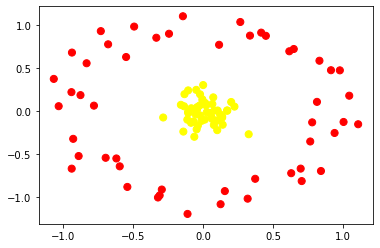

In [15]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

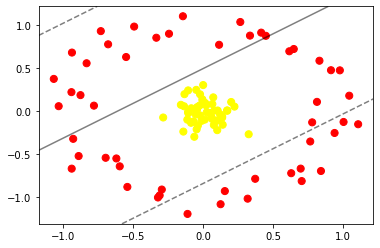

In [16]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [17]:
r = np.exp(-(X**2).sum(1))

In [18]:
r

array([0.26342684, 0.30155353, 0.34406323, 0.97579187, 0.99100866,
       0.36420321, 0.34406393, 0.54223637, 0.3453303 , 0.91220309,
       0.99194799, 0.9871619 , 0.99614688, 0.97743328, 0.98842743,
       0.99540886, 0.99578518, 0.96217718, 0.3931362 , 0.41171582,
       0.97804473, 0.99707281, 0.99352317, 0.50945488, 0.4899685 ,
       0.38880972, 0.23342344, 0.9814919 , 0.99909169, 0.97011264,
       0.26088989, 0.53480205, 0.41774599, 0.34441234, 0.98832288,
       0.96797411, 0.35459629, 0.50128072, 0.98682048, 0.99675953,
       0.32539674, 0.98900626, 0.97800256, 0.94976806, 0.98124119,
       0.29699583, 0.95574191, 0.96967543, 0.83536693, 0.91003755,
       0.54284301, 0.97865023, 0.39575185, 0.99521965, 0.3249924 ,
       0.38022459, 0.30673997, 0.28566166, 0.44842849, 0.31634695,
       0.366459  , 0.98988543, 0.98376818, 0.93297937, 0.31173604,
       0.91675046, 0.28801904, 0.97069391, 0.34033267, 0.98914957,
       0.37827227, 0.24557299, 0.38690426, 0.46537786, 0.94831

In [19]:
from mpl_toolkits import mplot3d

In [28]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1],r, c=Y, s= 50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")
    

In [21]:
from ipywidgets import interact, fixed

In [30]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim =[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180], 
         X =fixed(X), Y = fixed(Y), r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-9.38900271e-01, -6.72640972e-01],
       [ 1.25448123e-01, -1.08769044e+00],
       [-8.89278522e-01, -5.25465064e-01],
       [ 1.36782067e-01, -7.61356293e-02],
       [ 1.51350611e-02,  9.38239635e-02],
       [ 4.15599561e-01,  9.15052080e-01],
       [-6.78569082e-01,  7.78762994e-01],
       [-7.79815059e-01,  6.27832612e-02],
       [ 9.14491903e-01,  4.76401602e-01],
       [ 7.60458391e-04,  3.03137020e-01],
       [ 5.91109428e-02, -6.77532262e-02],
       [-2.66440958e-03,  1.13640312e-01],
       [-4.19724185e-02,  4.58135249e-02],
       [-1.12454196e-01, -1.00892501e-01],
       [-1.07280593e-01, -1.14422087e-02],
       [-2.54561722e-02,  6.28783886e-02],
       [-5.39334794e-02, -3.62616432e-02],
       [-2.14568800e-02,  1.95182657e-01],
       [-9.40742917e-01,  2.20458420e-01],
       [ 3.35477353e-01,  8.80270909e-01],
       [ 1.36398550e-01, -5.99608839e-02],
       [ 4.92066838e-02, -2.25871772e-02],
       

In [31]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0)

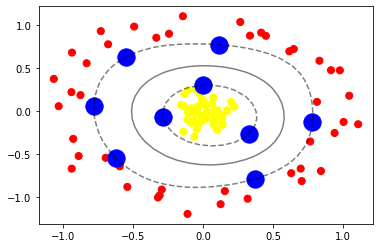

In [32]:
plt.scatter(X[:,0], X[:,1], c= Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s= 300, lw = 1, facecolors= "none")

## Ajustar los parametros de SVM

In [44]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

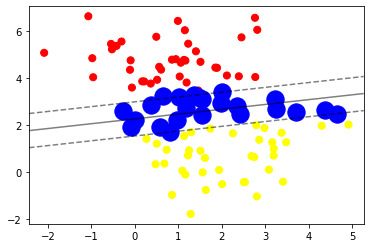

In [45]:
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=10)
model.fit(X,Y)
plt_svc(model)

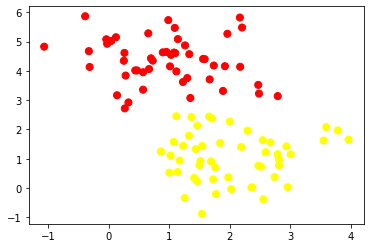

In [36]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c = Y, s= 50, cmap ="autumn")


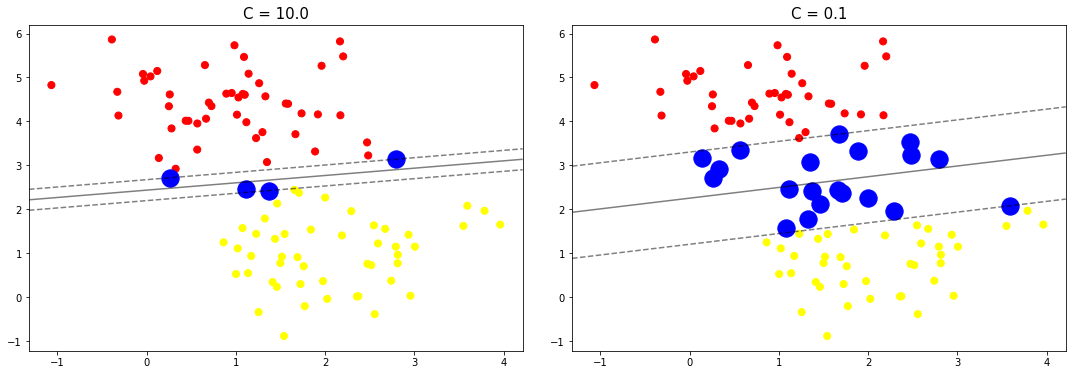

In [39]:
fig, ax = plt.subplots(1,2, figsize =(16,6))
fig.subplots_adjust(left=0.05, right = 0.95, wspace = 0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)